Tugas 1 Komputasi Statistika

Nama Anggota :
1. Faza Fahimatul 'Ilmiyah (2106638620)
2. Medifa Puspaningrum (2106634944)
3. Nadia Amelia Kirana (2106653224)
4. Aulia Shinta Madani (2106724984)

**IMPORTS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

**LOAD DATA** 

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
documents[:17]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**PREPROCESSING**

In [ ]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape

(11314, 1000)

**TOPIC MODELLING**

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
print(vectorizer.vocabulary_)

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

In [ ]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20185845, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2321243 , 0.        ,
        0.        ]])

In [ ]:
U, s, V = np.linalg.svd(X.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (11314, 11314) (1000,) (1000, 1000)
[16.51531273  9.92487725  8.19615597  7.91339664  7.6131204   7.32144228
  7.1523358   6.92718692  6.87982252  6.72510776  6.62240462  6.54554761
  6.49345393  6.37955551  6.22349006  6.1740069   6.07121774  5.97275599
  5.95413419  5.8925516   5.88178256  5.87629179  5.79001187  5.75930187
  5.7184988   5.61485099  5.59114173  5.55030422  5.53832583  5.50473567
  5.48972099  5.47680807  5.43726053  5.42593403  5.39777322  5.3873846
  5.36210088  5.31586005  5.27777318  5.25561843  5.24547434  5.22233585
  5.2036392   5.17067284  5.16904257  5.15154171  5.12317179  5.11709719
  5.0987621   5.08330554  5.06988613  5.04140617  5.01801363  5.00912941
  4.99731826  4.95592825  4.94504569  4.93207322  4.91973163  4.9110786
  4.90511802  4.89786533  4.87688451  4.85348822  4.84563012  4.83528182
  4.82622221  4.82119102  4.79898186  4.779562    4.77420945  4.75138446
  4.74023672  4.73249963  4.7266333   4.70879856  4.70321964  4.6

In [ ]:
from sklearn.decomposition import TruncatedSVD
# svd
svd = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd.fit(X)
result = svd.transform(X)
print("Ukuran Truncated X = ", result.shape)
len(svd.components_)

Ukuran Truncated X =  (11314, 20)


20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
Z = vsm.fit_transform(terms)

Z.shape

(1000, 1000)

**VISUALIZATION**

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2).fit_transform(result)
print(embedding.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(11314, 2)


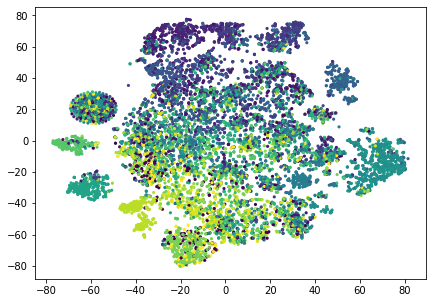

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, 
edgecolor='none'
)
plt.show()

In [ ]:
x_word = V[0,:] 
y_word = V[1,:]

print(vsm.vocabulary_)

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

In [ ]:
index_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [index_kata[i] for i in range(Z.shape[0])]
print(Label)

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'aren', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits'

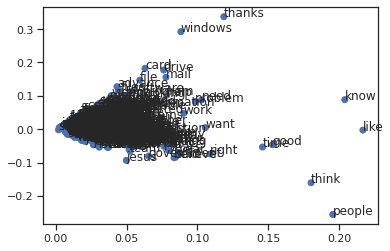

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_word, y_word, c=['b']*len(x_word))
for i, L in enumerate(Label):
    ax.annotate(L, (x_word[i],y_word[i]))

**kesimpulan**

Cara kelompok kami dalam mengetahui topik dari 20 newsgroup adalah =
1. Kami Import modul yang dibutuhkan dalam proses ini.
2. Load data yang dibutuhkan, kami menggunakan data 20 newsgroup
3. Lakukan preprocessing dengan load data dari list ke datafame, menghapus hal-hal yang tidak penting kecuali alphabet dan akan mengganti nya dengan blank space, menghapus short words, mengubah semua menjadi lowercase, dan menghapus stopwords
4. Lakukan SVD supaya dapat melihat 20 topic dengan jelas. 20 Topic tersebut adalah:
Topic 1: like know people think good time thanks  
Topic 2: thanks windows card drive mail file advance  
Topic 3: game team year games season players good  
Topic 4: drive scsi hard disk card drives problem  
Topic 5: windows file window files program problem version  
Topic 6: government space chip mail information data encryption  
Topic 7: like bike chip sounds know looks look  
Topic 8: card sale video monitor offer price jesus  
Topic 9: know card chip video government people clipper  
Topic 10: good know time bike problem jesus work  
Topic 11: think good chip clipper need encryption people  
Topic 12: thanks problem right bike good window time  
Topic 13: good people windows know sale file files  
Topic 14: space think know nasa problem year israel  
Topic 15: space good card thanks people year nasa  
Topic 16: people problem game window time work want  
Topic 17: problem good window israel people know israeli  
Topic 18: file time problem need files mail game  
Topic 19: need right file card files want good  
Topic 20: need time windows want israel window israeli
5. Lakukan visualisasi data yang sudah dibersihkan. Kami menggunakan t-SNE karena tidak dapat memvisualisasikan lebih dari 3 dimensi dan t-SNE dapat membantu memvisualisaskan dari data berdimensi tinggi ke rendah. Dari visualisasi dapat dihilat bahwa sebaran topik yang berdekatan adalah topik yang sering muncul dalam 20 newsgroup